In [32]:
#Funds to analyze 
#XLRE, XLF, XLK, BTC
#XLRE, XLF

#import yfinance as yahooFinance
#import datetime

# startDate , as per our convenience we can modify
#startDate = datetime.datetime(2008, 1, 1)
 
# endDate , as per our convenience we can modify
#endDate = datetime.datetime(2022, 12, 20)

#GetFacebookInformation = yahooFinance.Ticker("XLRE")
#print(GetFacebookInformation.history(start=startDate,
                                  #   end=endDate))



In [5]:
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [6]:
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
print(type(alpaca_api_key))
print(type(alpaca_secret_key))


<class 'str'>
<class 'str'>


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["XLRE", "XLF","XLK"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df
df_portfolio


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

XLRE = df_portfolio[df_portfolio['symbol']=='XLRE'].drop('symbol', axis=1)
XLF = df_portfolio[df_portfolio['symbol']=='XLF'].drop('symbol', axis=1)
XLK = df_portfolio[df_portfolio['symbol']=='XLK'].drop('symbol', axis=1)
#SP500 = df_portfolio[df_portfolio['symbol']=='^GSPC'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

df_portfolio = pd.concat([XLRE, XLF, XLK], axis=1, keys=["XLRE","XLF","XLK"])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

XLRE                                    \
                              open     high      low    close volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  31.1900  31.8088  31.1900  31.7100   3766   
2016-05-03 04:00:00+00:00  31.6050  31.8699  31.6050  31.8699   4691   
2016-05-04 04:00:00+00:00  31.6747  32.3300  31.6747  32.3299   1663   
2016-05-05 04:00:00+00:00  32.3400  32.3700  32.3047  32.3599   2650   
2016-05-06 04:00:00+00:00  32.2560  32.6680  32.2348  32.5300   3761   

                                                    XLF                   ...  \
                          trade_count       vwap   open     high     low  ...   
timestamp                                                                 ...   
2016-05-02 04:00:00+00:00          16  31.614259  23.33  23.5500  23.275  ...   
2016-05-03 04:00:00+00:00          22  31.802486  23.25  23.2700  23.020  ...   
2016-05-04 04:00:00+00:00          11  32.222387  22.95  23.1550  22.930  ...   
2016-05-05 04:00:00+00:00          34  32.348643  23.09  23.1775  22.970  ...   
2016-05-06 04:00:00+00:00          24  32.486150  22.86  23.1400  22.860  ...   

                                                              XLK          \
                             volume trade_count       vwap   open    high   
timestamp                                                                   
2016-05-02 04:00:00+00:00  35389630       39593  23.481169  42.22  42.485   
2016-05-03 04:00:00+00:00  35858748       49319  23.142931  42.15  42.240   
2016-05-04 04:00:00+00:00  37747077       41799  23.022753  41.86  42.040   
2016-05-05 04:00:00+00:00  38215354       37084  23.049344  42.04  42.135   
2016-05-06 04:00:00+00:00  31652361       39891  23.017640  41.76  42.250   

                                                                          
                             low  close    volume trade_count       vwap  
timestamp                                                                 
2016-05-02 04:00:00+00:00  42.04  42.44  12552678       33900  42.246906  
2016-05-03 04:00:00+00:00  41.91  42.05  12531192       26818  42.065738  
2016-05-04 04:00:00+00:00  41.80  41.92  11245655       29739  41.929356  
2016-05-05 04:00:00+00:00  41.84  41.94  13559918       22681  41.951480  
2016-05-06 04:00:00+00:00  41.76  42.25   9229886       27763  42.043873  

[5 rows x 21 columns]

In [9]:
df_portfolio.isnull().sum()

XLRE  open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
XLF   open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
XLK   open           0
      high           0
      low            0
      close          0
      volume         0
      trade_count    0
      vwap           0
dtype: int64

In [10]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.33,.33,.33],
    num_simulation=500,
    num_trading_days=252*30
)

MC_even.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996499,1.012297,1.015200,1.016027,1.017945,0.996918,0.999357,1.017352,0.991032,1.005846,...,0.998560,1.016474,0.998435,0.994688,0.992814,0.999685,0.998272,1.007310,1.011282,1.010219
2,1.015050,1.027125,1.022969,1.023061,1.009147,0.988146,0.975435,1.025874,0.999220,1.008835,...,1.000795,1.016524,0.998917,0.995807,0.987150,0.999103,0.992171,0.995419,0.999712,1.012513
3,1.026916,1.014278,1.017606,1.019341,1.022577,0.984962,0.988387,1.030717,1.006491,1.020604,...,1.003605,1.011500,1.005596,0.978328,0.991935,0.988866,0.984411,0.982296,1.012834,1.020612
4,1.035091,1.022850,1.022674,1.006586,1.022067,0.972794,0.989604,1.033762,1.006946,1.026572,...,0.989559,1.024140,1.016383,0.986326,0.980628,0.971396,0.975476,1.003902,1.014810,1.025223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,151.846594,227.520473,63.471884,25.133226,207.291544,89.547530,134.373591,128.062811,85.491092,52.317282,...,59.847932,69.887424,44.634705,228.953217,268.457572,227.081410,27.128915,112.783331,24.251471,127.990447
7557,151.584144,227.067373,62.246730,24.718058,208.005918,89.196872,132.337046,130.859669,85.996266,52.154860,...,59.884959,70.368188,44.174278,227.865644,269.753789,228.817253,27.631479,112.716726,24.626542,128.239508
7558,152.845987,225.296831,62.382802,24.866031,207.877550,89.293458,133.097493,130.172590,84.430428,52.663265,...,59.795425,70.278559,44.366309,226.354255,269.225265,229.485704,27.403329,112.173543,24.822033,130.375047
7559,153.270295,226.000418,62.871020,24.823690,207.718162,90.024065,133.436631,129.826752,85.281602,52.633014,...,60.614555,70.577432,44.563530,226.908225,272.558276,232.424264,27.478398,112.703577,25.180020,128.835576


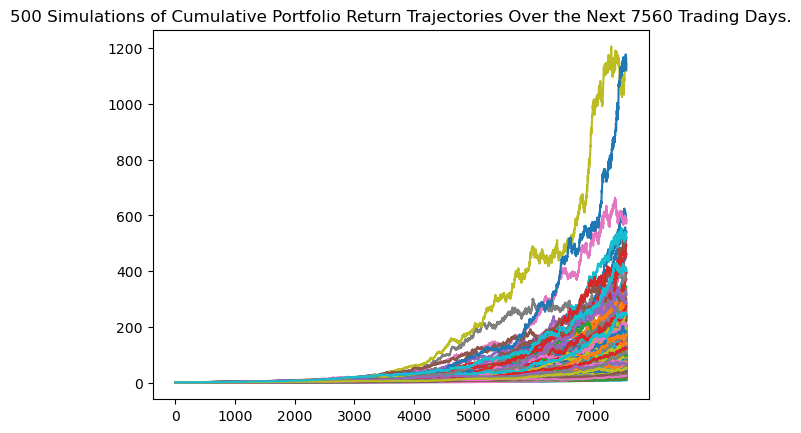

In [11]:
line_plot = MC_even.plot_simulation()

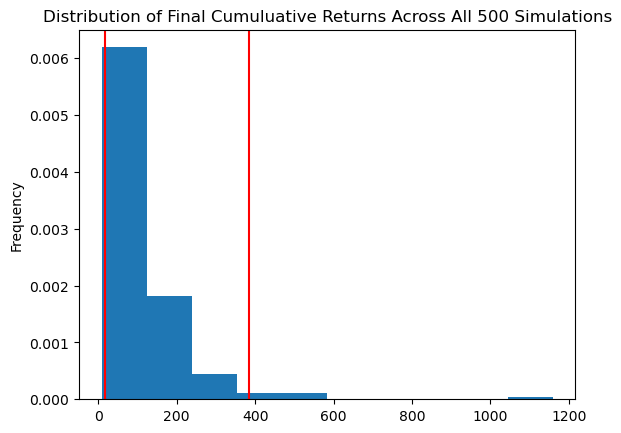

In [12]:
dist_plot = MC_even.plot_distribution()

In [13]:
tbl_even = MC_even.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_even)

count            500.000000
mean             110.208039
std              110.375641
min                8.377910
25%               48.552602
50%               80.069304
75%              136.453689
max             1158.880746
95% CI Lower      17.057565
95% CI Upper     383.270161
Name: 7560, dtype: float64


In [15]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_even[8]*initial_investment,2)
ci_upper= round(tbl_even[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $341151.3 and $7665403.22


In [17]:
# XLRE, XLF, XLK ----- 60, 20, 20 
MC_XLRE_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.60,.20,.20],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLRE_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002534,0.999982,0.985891,0.997579,0.993402,0.993363,0.998658,0.999960,0.992174,0.998846,...,1.001701,1.009714,1.008381,0.995531,1.002718,1.000376,1.015434,1.011315,0.995348,0.993398
2,1.010813,1.005747,0.990234,1.002774,0.983251,1.007583,1.005674,0.986907,0.986342,0.998064,...,1.016325,1.021556,0.998743,1.000759,0.998459,0.992201,1.023922,0.993137,0.994838,0.983766
3,1.011619,1.021216,0.993072,1.002789,0.976639,1.010410,1.007801,0.999565,0.980649,1.008940,...,1.021521,1.016017,0.991766,0.998648,0.982186,0.979460,1.028340,0.986921,0.994707,0.985741
4,0.996434,1.014933,1.007301,1.010523,0.977826,1.008314,1.018469,1.009897,0.978255,1.007193,...,1.029662,1.010389,0.998133,0.997330,0.995526,0.984291,1.024199,0.978873,0.999655,0.970930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.475305,83.797403,21.872393,40.615526,74.774270,48.651650,105.286066,4.779267,20.876772,53.307071,...,22.386957,40.971375,49.184020,72.536376,14.491352,29.392526,33.443575,35.716364,15.458832,10.658662
7557,26.474274,83.431413,21.591650,40.822100,74.304331,48.953810,104.905557,4.759709,20.990857,53.026441,...,22.222074,41.999791,49.468262,72.702182,14.541497,29.540731,33.360273,35.546010,15.393461,10.711193
7558,26.450167,83.796140,21.843469,40.922749,74.797770,49.075039,105.370884,4.738223,20.805935,52.812680,...,22.617078,41.412749,50.131410,72.235694,14.276648,29.591716,34.207238,35.578426,15.468907,10.778022
7559,26.510688,84.302055,22.280917,40.358606,74.483607,49.808021,106.868685,4.694412,20.799752,52.315225,...,22.243913,40.956981,50.135064,73.256208,14.287853,29.447986,34.046645,35.790583,15.384691,10.881005


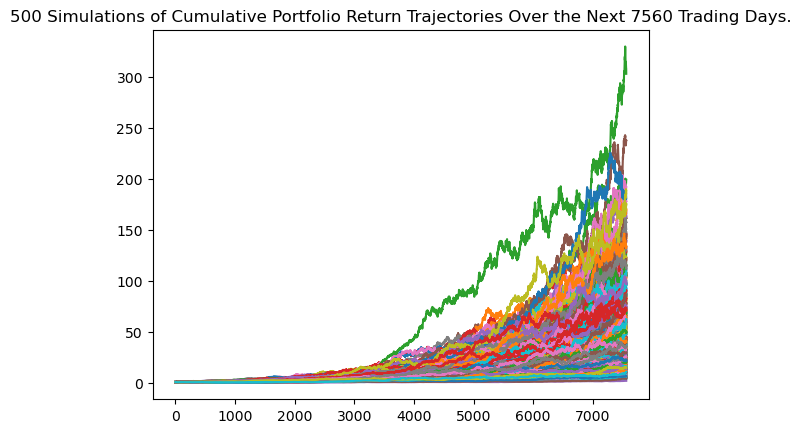

In [18]:
line_plot = MC_XLRE_60.plot_simulation()

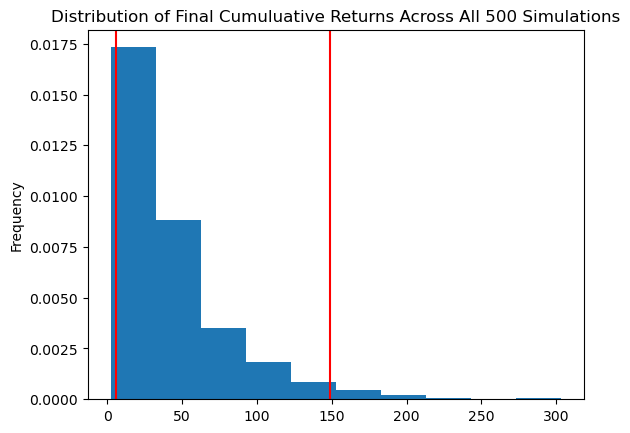

In [19]:
dist_plot = MC_XLRE_60.plot_distribution()

In [20]:
tbl_XLRE_60 = MC_XLRE_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLRE_60)

count           500.000000
mean             44.019180
std              39.036089
min               2.198640
25%              18.612961
50%              30.978518
75%              57.462224
max             303.476879
95% CI Lower      5.866934
95% CI Upper    148.776869
Name: 7560, dtype: float64


In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLRE_60[8]*initial_investment,2)
ci_upper= round(tbl_XLRE_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $117338.69 and $2975537.38


In [22]:
# XLRE, XLF, XLK ----- 20, 60, 20 
MC_XLF_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.20,.60,.20],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLF_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000790,1.016862,0.997580,0.990922,1.021576,0.994609,1.010394,0.994105,0.998700,1.008147,...,0.996147,0.998741,0.984729,1.021801,1.002420,0.994185,0.988872,1.004688,1.002365,0.997081
2,1.003758,1.003640,1.014986,0.988166,1.021138,0.982580,1.008118,0.990088,0.986477,1.013263,...,0.996628,1.014539,0.992382,1.018157,1.001669,0.992269,0.993710,1.007129,0.986051,0.982033
3,1.000116,0.996602,1.021626,0.981589,1.037521,0.976168,1.026607,0.989019,0.962626,1.013049,...,0.995717,1.019991,1.002347,1.020260,0.994913,0.995571,0.987411,1.004776,0.988517,0.982485
4,0.996491,0.993318,1.013726,0.980002,1.037433,0.983010,1.025936,0.981148,0.973724,1.014636,...,1.021343,1.033381,0.985713,1.019668,0.988681,0.985067,0.996484,0.996510,0.970177,0.961059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,89.514446,25.184418,16.455339,109.271227,5.045873,18.706749,48.612884,47.500605,16.696543,112.448561,...,139.345864,4.997106,20.510991,79.696859,19.647427,73.342897,104.139952,48.545790,44.071955,15.182184
7557,89.121277,25.705133,16.733584,108.877100,5.085709,18.818035,48.376348,47.986337,16.721283,111.413730,...,141.490148,4.943161,20.389199,78.705979,19.346965,71.794173,104.449881,48.691568,45.183757,15.191944
7558,89.235865,25.631289,16.659562,107.877360,5.201023,18.819307,48.943657,48.508825,16.727546,110.872059,...,141.743684,4.923154,20.189621,78.573468,19.367115,71.908836,105.006479,49.038375,44.050757,15.176976
7559,88.270494,25.150073,16.552838,108.668144,5.172690,18.833338,50.013304,49.392943,16.448028,113.045414,...,141.600810,4.799282,19.950010,78.186873,19.444326,72.784034,105.723254,49.238313,43.929421,15.093451


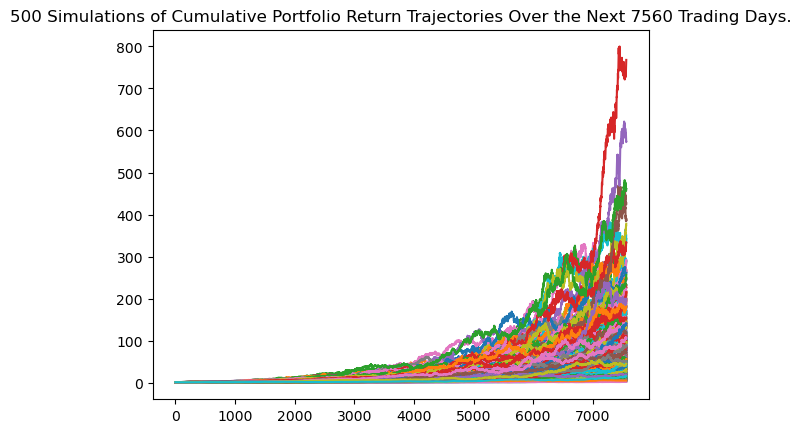

In [23]:
line_plot = MC_XLF_60.plot_simulation()

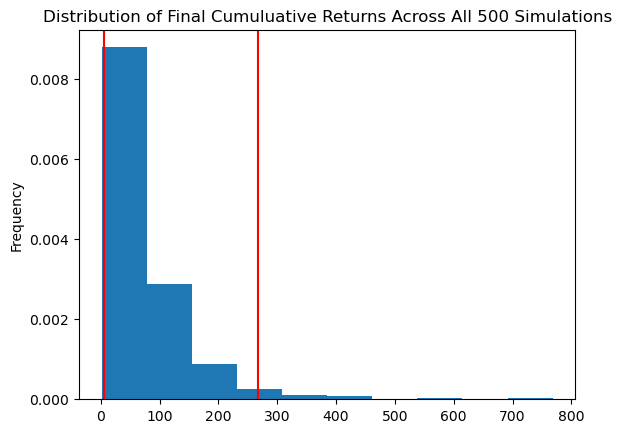

In [24]:
dist_plot = MC_XLF_60.plot_distribution()

In [25]:
tbl_XLF_60 = MC_XLF_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLF_60)

count           500.000000
mean             74.032154
std              78.388090
min               1.780501
25%              26.970020
50%              49.589982
75%              94.475468
max             767.935728
95% CI Lower      6.514170
95% CI Upper    268.031591
Name: 7560, dtype: float64


In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLF_60[8]*initial_investment,2)
ci_upper= round(tbl_XLF_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $130283.4 and $5360631.82


In [27]:
# XLRE, XLF, XLK ----- 20, 20, 60 
MC_XLK_60 = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.20,.20,.60],
    num_simulation=500,
    num_trading_days=252*30
)

MC_XLK_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gamez\Documents\fintech\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990881,0.997554,0.999086,1.014032,0.987266,0.988709,1.007549,0.992557,0.994065,0.990198,...,0.983945,1.007472,0.991968,1.001799,1.004469,1.005194,1.009857,1.020043,0.997995,1.015535
2,0.986976,0.977463,0.993885,1.007345,0.978776,0.990907,1.023053,0.974002,0.983621,0.976101,...,0.988997,1.017719,1.003551,1.013512,0.996740,1.002860,1.012938,1.039013,0.984917,1.009758
3,0.974994,0.975984,0.989301,1.012757,0.971797,0.994951,1.012624,0.997209,0.980750,0.972980,...,0.989181,1.009016,1.007117,1.036371,1.001265,1.009769,1.017702,1.032190,0.969357,1.008788
4,0.978971,0.984786,0.982694,1.008777,0.959838,0.994935,1.017664,0.985912,0.984627,0.966267,...,1.010548,1.013120,0.999367,1.046440,0.998101,1.006506,1.010319,1.033947,0.966570,1.002073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,178.796756,342.533198,60.833033,898.259026,35.272496,681.245689,797.484549,246.212013,488.814558,185.310309,...,191.402161,1366.467697,333.085117,237.115393,490.854507,320.426260,272.457396,143.108447,476.667118,80.883025
7557,176.738587,343.767560,60.534937,910.782553,35.851567,675.437537,800.344034,246.766248,488.175565,186.498389,...,190.158171,1381.825239,331.692370,237.315296,499.615900,321.396383,270.303244,142.828201,468.516025,82.245999
7558,178.422725,345.166440,61.104518,912.989904,36.350467,681.773596,795.611413,242.591175,489.207225,186.288152,...,187.725080,1385.816667,330.127267,238.077824,501.023328,320.332340,269.702690,144.271028,477.337910,81.834744
7559,174.968198,344.838009,61.890260,909.685817,36.249301,684.071957,805.346356,240.681973,490.675541,187.152669,...,193.384144,1382.718262,326.232866,235.699232,506.552837,319.107583,266.595406,145.381989,480.728484,81.587017


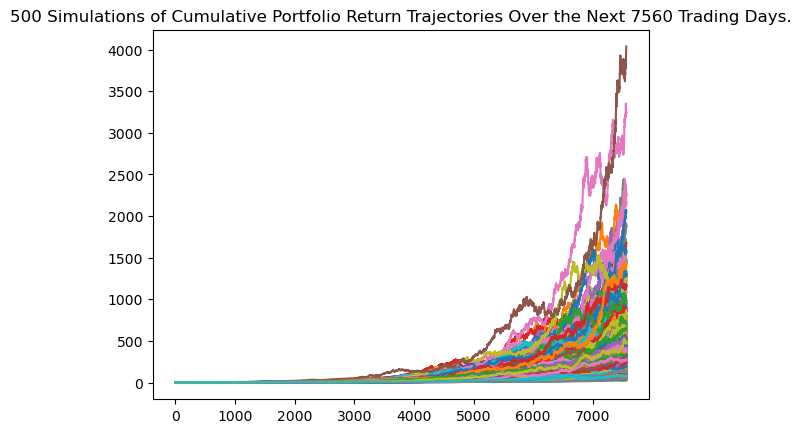

In [28]:
line_plot = MC_XLK_60.plot_simulation()

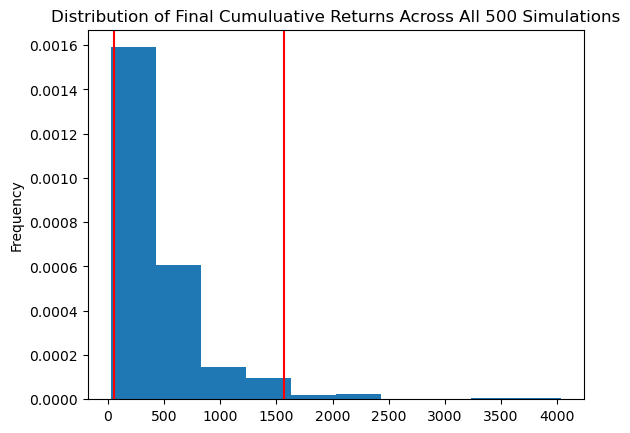

In [29]:
dist_plot = MC_XLK_60.plot_distribution()

In [30]:
tbl_XLK_60 = MC_XLK_60.summarize_cumulative_return()

# YOUR CODE HERE!
print(tbl_XLK_60)

count            500.000000
mean             436.776600
std              433.821177
min               25.405614
25%              168.367202
50%              301.764010
75%              558.118794
max             4037.120420
95% CI Lower      53.715374
95% CI Upper    1569.121103
Name: 7560, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower= round(tbl_XLK_60[8]*initial_investment,2)
ci_upper= round(tbl_XLK_60[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1074307.48 and $31382422.06
